In [1]:
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import FileUpload
import io

In [2]:
from ipywidgets import FileUpload
import io
from PIL import Image

uploader = FileUpload(accept='.jpg,.png,.jpeg', multiple=False)
uploader

FileUpload(value=(), accept='.jpg,.png,.jpeg', description='Upload')

In [3]:
# uploader.value is a TUPLE, so take first element
file_data = uploader.value[0]

# Get raw bytes
file_content = file_data['content']

# Convert bytes → Image
img_original = Image.open(io.BytesIO(file_content))

# Save locally
image_path = "uploaded_image.jpg"
img_original.save(image_path)

print("Image uploaded successfully:", image_path)

Image uploaded successfully: uploaded_image.jpg


In [4]:
jpeg_quality = 1  # LOWER = MORE BLUR

compressed_path = "jpeg_compressed.jpg"
img_original.save(compressed_path, "JPEG", quality=jpeg_quality)

print("Compressed with JPEG at quality =", jpeg_quality)

Compressed with JPEG at quality = 1


In [5]:
img_reconstructed = Image.open(compressed_path)

In [6]:
img_compressed_visual = img_reconstructed.filter(ImageFilter.GaussianBlur(radius=2))

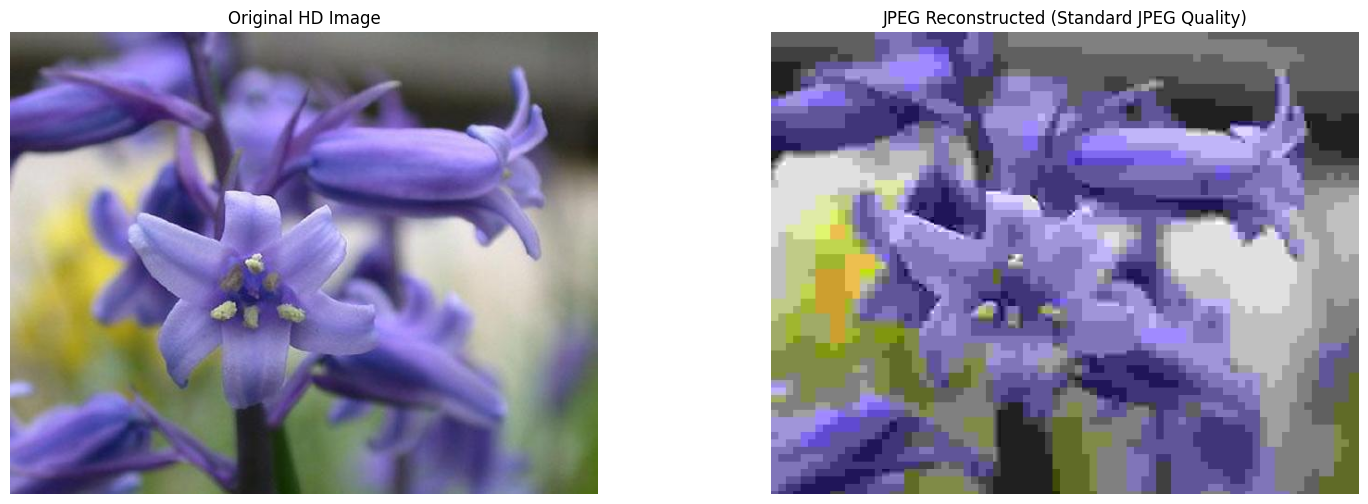

In [8]:
plt.figure(figsize=(18,6))

# 1. Original HD
plt.subplot(1,2,1)
plt.imshow(img_original)
plt.title("Original HD Image")
plt.axis("off")

# 2. Reconstructed JPEG (normal JPEG)
plt.subplot(1,2,2)
plt.imshow(img_reconstructed)
plt.title("JPEG Reconstructed (Standard JPEG Quality)")
plt.axis("off")

plt.show()

In [9]:
import os

# Image file sizes
original_size = os.path.getsize(image_path) / 1024   # in KB
compressed_size = os.path.getsize(compressed_path) / 1024   # in KB

print("Original Size (KB):", original_size)
print("Compressed Size (KB):", compressed_size)

compression_ratio = original_size / compressed_size

Original Size (KB): 29.1689453125
Compressed Size (KB): 6.287109375


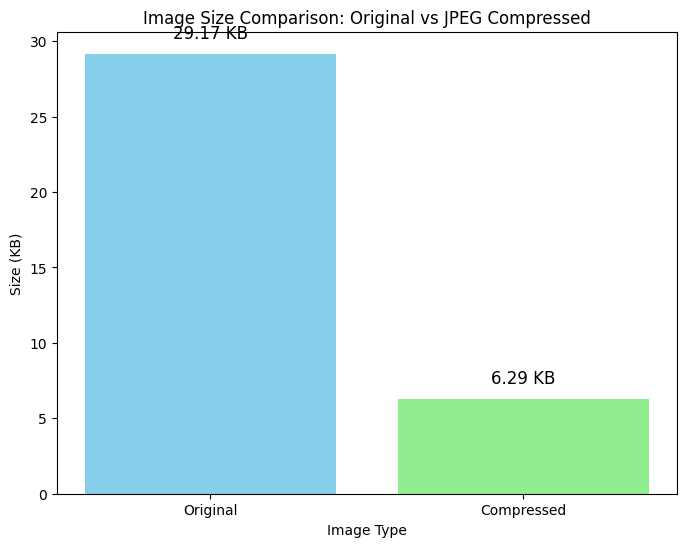


Average Original Size: 29.17 KB
Average Compressed Size: 6.29 KB
Compression Ratio: 4.64x smaller


In [10]:
import matplotlib.pyplot as plt

labels = ['Original', 'Compressed']
sizes = [original_size, compressed_size]
colors = ['skyblue', 'lightgreen']

plt.figure(figsize=(8,6))
plt.bar(labels, sizes, color=colors)

plt.title("Image Size Comparison: Original vs JPEG Compressed")
plt.ylabel("Size (KB)")
plt.xlabel("Image Type")

# Adding data labels above bars
for i, v in enumerate(sizes):
    plt.text(i, v + 1, f"{v:.2f} KB", ha='center', fontsize=12)

plt.show()

print(f"\nAverage Original Size: {original_size:.2f} KB")
print(f"Average Compressed Size: {compressed_size:.2f} KB")
print(f"Compression Ratio: {compression_ratio:.2f}x smaller")